#### Benjamin Sinko

# Compartmental Model of Covid-19

### Background
The SIR model assumes a static population (thus no births or deaths) divided into three mutually exclusive groups: those susceptible to the disease ($S$), those infected with the disease ($I$), and those recovered with immunity from the disease ($R$). 

This model is clearly not applicable to all possible epidemics: there may be non-zero births and deaths, people getting re-infected, ect. All these factors should be taken into account by more complex models, which are beyond the modeling capability and skills covered up to this point in  CMSE 201.

The SIR model consists of three  ordinary differential equations, parameterized by two growth factors β and γ:

$$
\begin{array}{l}
\frac{d S}{d t}=-\frac{\beta I S}{N} \\
\frac{d I}{d t}=\frac{\beta I S}{N}-\gamma I \\
\frac{d R}{d t}=\gamma I
\end{array}
$$

Here $N$ is total size of the population, and since each of $S$, $I$ and $R$ represent the number of people in mutually exclusive groups, we should have $S+I+R=N$.

Here we are going to use the SIR model to fit the COVID-19 curve in Italy, which means we are going to find the best values of $\beta$ and $\gamma$ to model the exisiting cases as a function of time,  and then predict the emergence of future  cases.

### 1. Load and inspect the data

The data in question comes from the World Health Organization (WHO), and it is used to predict the cases and deaths of COVID-19 around the world. The data has  information for  new cases, new deaths, cumulative cases and cumulative deaths for all the countries from 01/03/2020 until now.

&#9989;&nbsp; **Question 1: (2 points)** Load the provided data `WHO-COVID-19-global-data.csv` using Pandas, and  then  display the last 15 rows of the resulting data frame.

In [108]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [109]:
# Put your code here
C19  = pd.read_csv("WHO-COVID-19-global-data.csv")
C19.tail(15)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
73428,2020-10-26,ZW,Zimbabwe,AFRO,7,8276,1,237
73429,2020-10-27,ZW,Zimbabwe,AFRO,27,8303,5,242
73430,2020-10-28,ZW,Zimbabwe,AFRO,12,8315,0,242
73431,2020-10-29,ZW,Zimbabwe,AFRO,5,8320,0,242
73432,2020-10-30,ZW,Zimbabwe,AFRO,1,8321,0,242
73433,2020-10-31,ZW,Zimbabwe,AFRO,41,8362,0,242
73434,2020-11-01,ZW,Zimbabwe,AFRO,5,8367,1,243
73435,2020-11-02,ZW,Zimbabwe,AFRO,7,8374,0,243
73436,2020-11-03,ZW,Zimbabwe,AFRO,15,8389,2,245
73437,2020-11-04,ZW,Zimbabwe,AFRO,21,8410,1,246


### 2. Visualize the data

&#9989;&nbsp; **Question 2: (4 points)**: Select all the rows with `Country_code=="IT"` and plot the **daily new Covid-19 cases in Italy**.

Hints: 
1. To correctly select the column with the specified `Country_code`, you might want to use `data['Country_code']` from `data.columns`. Similarly, you can use `["New_cases"]` to select the new cases.
2. Use `reset_index` to get days after 2020-01-03 (the first day in the data).

0        0
1        0
2        0
3        0
4        0
      ... 
95    3599
96    3039
97    3836
98    4204
99    3951
Name:  New_cases, Length: 100, dtype: int64

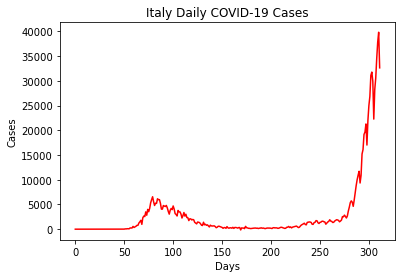

In [143]:
# Put your code here
country = 'IT'
is_country = C19[' Country_code'] == country
daily = C19[' New_cases']
daily_IT = daily[is_country]
daily_IT.reset_index(drop=True, inplace=True)
plt.plot(daily_IT,color='red')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Italy Daily COVID-19 Cases')
daily_IT.head(100)

### 3. Solve the equations and plot the model vs data

&#9989;&nbsp; **Question 3: (8 points)** Assume that $\beta=13$,  $\gamma=12.5$, and that the total population of Italy is 60,432,485 (wikipedia). On day 50 of the outbreak in Italy there were 14 new cases, so we have $I(50)=14$, $S(50)=60432471$ and $R(50)=0$. Now let's solve the initial value problem in the range  [50,200), as we are only planning to fit the first wave of the COVID-19 outbreak.

**Solve the intial value problem based on the equations given above**, and plot the curve of the **predicted daily new cases $I$** together with **the real observed daily new cases** in the time range from Day 50 to Day 200.

In [146]:
# Put your code here
from scipy.integrate import solve_ivp

b = 13
g = 12.5
def SIR(time, current_state):
    
    susceptible = current_state[0]
    infected = current_state[1]
    recovered = current_state[2]
    N = susceptible+infected+recovered
    
    susceptible_dot = -b*infected*susceptible/N
    infectious_dot = (b*infected*susceptible/N) - g*infected
    recovered_dot = g*infected
    
    return [susceptible_dot, infectious_dot, recovered_dot]




initial_conditions = [60432471,14,0]
time = np.arange(50,200)

result = solve_ivp(SIR, (50,200), initial_conditions, t_eval = time)

susceptible = result.y[0]
infectious = result.y[1]
recovered = result.y[2]

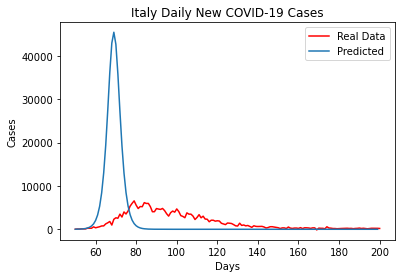

In [147]:
daily_IT.to_list()
plt.plot(daily_IT[50:201],color='red',label='Real Data')
plt.plot(time,infectious,label='Predicted')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Italy Daily New COVID-19 Cases')
plt.legend()

In [158]:
daily_IT = daily_IT[50:200]

### 4. Model the data and predict  future new COVID-19 cases

&#9989;&nbsp; **Question 4: (8 points)**: Modeling the COVID-19 data. By solving the intial value problem (abstracted into equations above), we can estimate the infected cases based on a given $\beta$ and $\gamma$. Since we have the observed data (the number of new cases over time), now we want to know the values of $\beta$ and $\gamma$ that best describe or predict our data. 

**Find optimal $\beta$ and $\gamma$ describing the covid data**,  re-do the calculation of predicted COVID-19 cases with these optimized parameters, and plot the new predicted curve  together with the original data.

#### hint:
1. Write a function with an input of a list [beta,gamma] which can take any $\beta$ and $\gamma$ values, and with an output as the difference between the estimated infected cases and the real infected cases (for example, the sum of squared differences or the least square difference).
2. Use `scipy.optimize.minimize` to find the optimal values of $\beta$ and $\gamma$.

In [152]:
# Put your code here
from scipy.optimize import minimize


def dif(lst):
    squares = (lst[0]-lst[1])**2
    return np.sum(squares)

lst = [daily_IT,infectious,]

x0=[13,12.5]

res = minimize(dif, x0)
res

      fun: 2.2825982814815407e-20
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([1.52033266e-08, 1.45989958e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([12.75, 12.75])

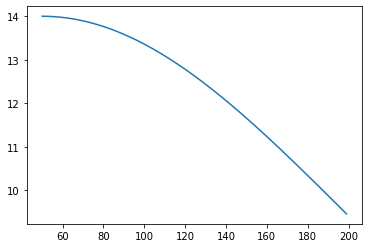

In [163]:
b = 12.75
g = 12.75
def SIR(time, current_state):
    
    susceptible = current_state[0]
    infected = current_state[1]
    recovered = current_state[2]
    N = susceptible+infected+recovered
    
    susceptible_dot = -b*infected*susceptible/N
    infectious_dot = (b*infected*susceptible/N) - g*infected
    recovered_dot = g*infected
    
    return [susceptible_dot, infectious_dot, recovered_dot]




initial_conditions = [60432471,14,0]
time = np.arange(50,200)

result = solve_ivp(SIR, (50,200), initial_conditions, t_eval = time)


infectious = result.y[1]
plt.plot(time,infectious,label='Predicted')

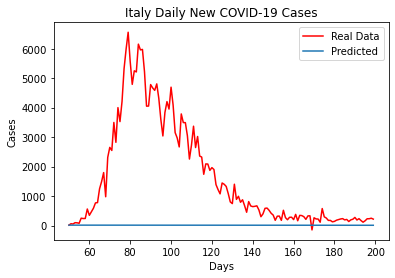

In [159]:
plt.plot(daily_IT,color='red',label='Real Data')
plt.plot(time,infectious,label='Predicted')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Italy Daily New COVID-19 Cases')
plt.legend()

&#169; Copyright 2020, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.